# **Applied Statistics Worksheet 1:  Recap on Random Variables, Probability Distributions & Sampling**

***SEMT20002 — Nikolai Bode***

This worksheet focusses on the material covered in Lecture 1: Random Variables, PDFs, CDFs and sampling. It is expected that the theory of this material is revision from Engineering Mathematics 1 (except for, perhaps, the Inverse Probability Integral Transform, see section 5). The purpose of this worksheet is to provide you with the Python commands for working with probability distributions, some of which you will have already used in the course, and to introduce some of the plots we will be using throughout.

The instructions for what you are expected to do are either shown in the text or given as comments in the code boxes.

## **Packages**

Whilst packages are mentioned (and used in the solutions provided), please do not simply run code to import these packages, in case some import packages are not compatible with what you have already installed.

From solutions, only copy the relevant lines into your own file and then execute, checking functionality with existing installed packages, and only importing new packages when needed. For plotting results in particular, we suggest you focus on using functions you know already rather than trying texactlyly replicate the plots shown in lectures or in solution

For this worksheet, the functionalities required are contained within `scipy.stats`. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import scipy.stats as stats

## **1. Random Variables (RVs)**

In Lecture 1 we encountered Random Variables with various distributions: 
Binomial, Uniform, Exponential, Gamma.

We used these RVs to model data generated by some real world process.
For example, we assumed that the outcome of a coin toss is well described by a Binomial (or Bernoulli) RV.

Let's see how to visualise and sample (*ie* generate numbers) from these distributions in **PYTHON**.


### Binomial Distribution
The Binomial distribution is a discrete distribution 
$$X \sim \mathrm{Binomial}(n, p)$$
with two parameters: $p \in [0, 1] $  and $n \in N$.


 __n - trail number; p - success number__


The domain (*ie* possible outcomes) is the set of all integers less or equal to $ n: h = 0, 1, ..., n$.

The value $h$ can be interpreted as the number of successes in $n$ independent trials, if the probability of success in each trial is $p$. 
One example is where 
$$h = \text{no. heads in}\ n\ \text{tosses of a (possibly unfair) coin},$$ 
where $p$ is the probability of a head. 
The *Bernoulli distribution* (*eg* the outcome of one coin toss) is a Binomial distribution with $n=1$.


In python, you can create a binomial distribution with the parameter values $n=10$ and $p=0.5$ using `stats.binom(n,p)`:

In [4]:
# Create a binomial distribution with the parameters provided:
n = 10 # number of trials
p = 0.5 # probability of success on each trial

ProbDist = stats.binom(n,p)

print("Binomial Distribution with n =", n, "and p =", p)
print("Mean:", ProbDist.mean())
print("Variance:", ProbDist.var())


Binomial Distribution with n = 10 and p = 0.5
Mean: 5.0
Variance: 2.5


#### Theoretical PMF

The Binomial PMF (probability mass function) is 
$$P_H(h;n, p) = {n \choose h} p^h (1-p)^{n-h}.$$
In Python you can use `pd.pmf(x)` to evaluate the PDF (probability density function) or PMF of a distribution `pd` at the points in `x`.



Outcomes: range(0, 11)
PMF values: [0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


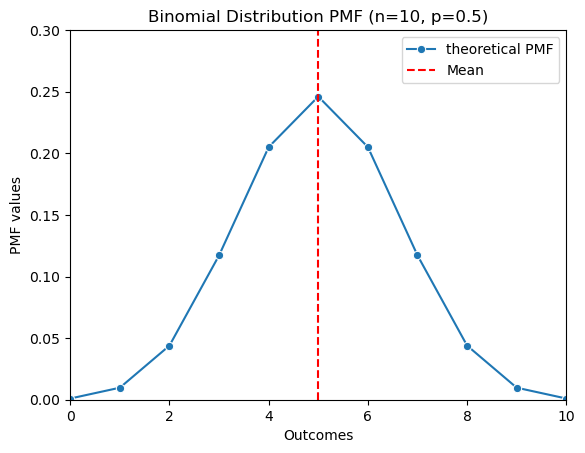

In [34]:

outcomes = range (0,11,1) # Define the range of outcomes of Random Variable X; as n=10, outcomes are from 0 to 10
pmf_values = ProbDist.pmf(outcomes) # Calculate Probability Mass Function (PMF) for each outcome
binomial_mean = ProbDist.mean() # Calculate the theoretical mean of the distribution: E[X] = n*p
print("Outcomes:", outcomes)
print("PMF values:", pmf_values)

# Plotting PMF
# def plot_pmf(ax, outcomes, pmf_values):
ax = sns.lineplot(x=outcomes, y=pmf_values, marker='o', label ='theoretical PMF')

# Plotting mean
ax.vlines(binomial_mean, 0, 1, color='red', linestyle='--', label='Mean')
ax.set(
    xlim = (0, 10), 
    ylim = (0,0.3),
    xlabel = 'Outcomes',
    ylabel = 'PMF values',
    title = 'Binomial Distribution PMF (n=10, p=0.5)'
)
ax.legend()

#### Generate a random sample 
In Python, you can use `pd.rvs(size=(rows, columns))` to generate a matrix of *rows x columns* random numbers from a specific distribution *pd* defined.

In [22]:
# Generate 10 random variates from the binomial distribution specified above:

small_samples = ProbDist.rvs(size=10) # Use "rvs()" to pick 10 (small samples) random variates/samples from the distribution (n =10, p=0.5)
print("Generated 10 binomial variates:", small_samples) # The outcome is the success number in 10 trials

Generated 10 binomial variates: [7 6 6 7 5 5 5 4 5 3]


Here, `numpy.random.seed()` can be used to set Python's random number generator to a specific seed, so that a given identical sequence of (pseudo)random numbers is generated each time a function is called (ask if you want to find out more).

#### Empirical PMF 
Given a list of numbers, the empirical PDF or PMF can be visualised using a histogram.


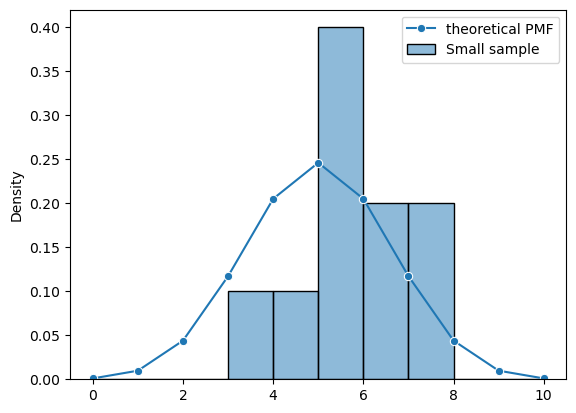

In [26]:
# Plot a histogram with normalization to form a PMF

bin_edge = range(0,11) # Define bin edges for histogram
ax = sns.lineplot(x=outcomes, y=pmf_values, marker='o', label ='theoretical PMF')
sns.histplot(small_samples, bins=bin_edge, stat='density',alpha = 0.5 ,label='Small sample')
ax.legend()


Here the normalisation refers to how the height of the bars in the histogram are computed. Often, the heights just show the frequency of observations in each bin. However, this is not appropriate for comparison to a PMF/PDF. So the bars need to be normalised to ensure the sum of their areas equals to 1.

Let's draw a larger sample with 10,000 observations. Note that the empirical PMF of the larger sample is very close to the theoretical PMF plotted earlier (try to plot both on topc of each other).

Large_sample [4 6 5 ... 4 4 3]


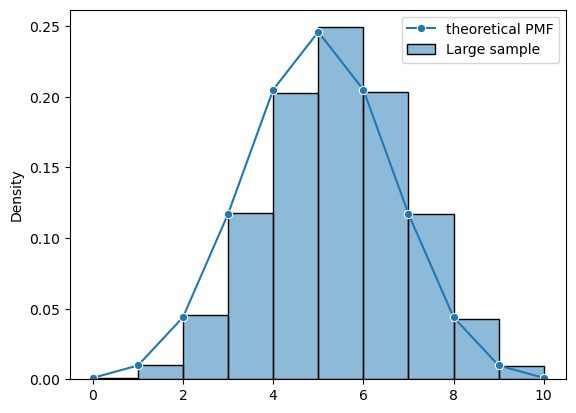

In [27]:
large_samples = ProbDist.rvs (size=10000) # Generate 10,000 random variates (large samples) from the same distribution
ax = sns.lineplot(x=outcomes, y=pmf_values, marker='o', label ='theoretical PMF')
sns.histplot(large_samples, bins=bin_edge, stat='density',alpha = 0.5 ,label='Large sample')
print("Large_sample",large_samples)
ax.legend()

#### Theoretical CDF

In Python you can use `pd.cdf(x)` to evaluate the Cumulative Distribution Function (CDF) of a distribution pd at the points in x. Recall that the CDF of a discrete random variable is usually plotted as a step function. Try to do so but don't spend too long on it.


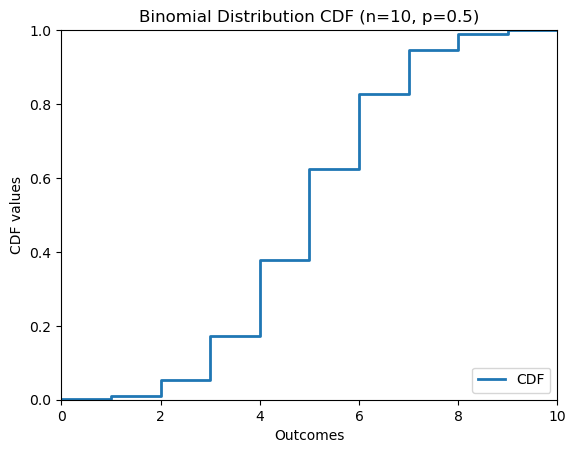

In [ ]:
# evaluate and plot the CDF for the binomial distribution specified above:
cdf_values = ProbDist.cdf(outcomes) # Calculate Cumulative Distribution Function (CDF) for each outcome  P(X ≤ each outcome)

figure,ax = plt.subplots() # Define a new figure and axes
ax.step(outcomes, cdf_values, where='post', label='CDF', linewidth=2)
ax.set(
    xlim = (0, 10),
    ylim = (0,1),
    xlabel = 'Outcomes',
    ylabel = 'CDF values',
    title = 'Binomial Distribution CDF (n=10, p=0.5)'
)
ax.legend(['CDF'], loc = 'lower right')

#### Empirical CDF

Given a list of numbers (i.e. data) the empirical CDF can be computed using `stats.ecdf(data)`:

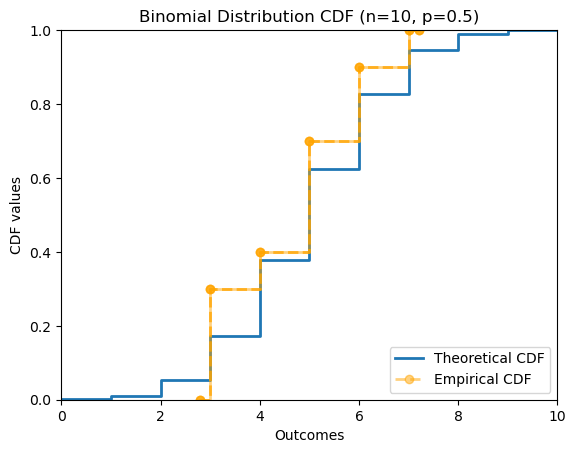

In [76]:
# evaluate and plot the empirical CDF for the smaller sample from above:
res = stats.ecdf(small_samples)
res.cdf.plot(drawstyle = 'steps', linestyle='-', marker ='o',color = 'orange', linewidth=2, ax = ax, alpha = 0.5)
ax.legend(['Theoretical CDF', 'Empirical CDF'], loc = 'lower right')
ax.figure

The empirical CDF of the larger sample with 10,000 observations generated earlier is very close to the theoretical CDF.


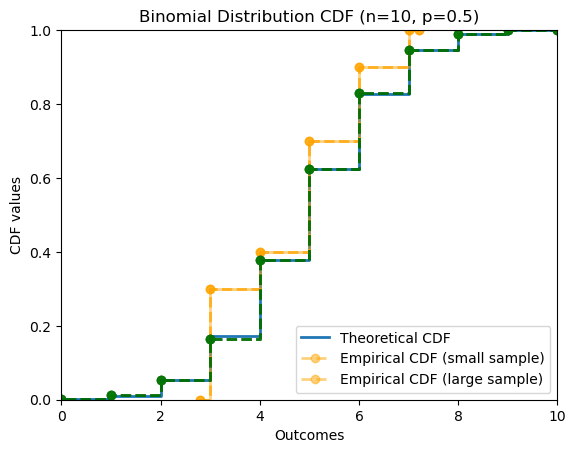

In [81]:
# evaluate and plot the empirical CDF for the larger sample from above:
res = stats.ecdf(large_samples)
res.cdf.plot(drawstyle = 'steps', linestyle='--', marker ='o',color = 'green', linewidth=2, ax = ax, alpha = 0.5)
ax.legend(['Theoretical CDF', 'Empirical CDF (small sample)', 'Empirical CDF (large sample)'], loc = 'lower right')
ax.figure

#### Quantile Function

The quantile function is the inverse of the CDF. In Python, you can use `pd.ppf(x)` to evaluate the inverse of distribution `pd` at points x.

Inverse CDF at 0.1: 3.0
Inverse CDF at 0.2: 4.0


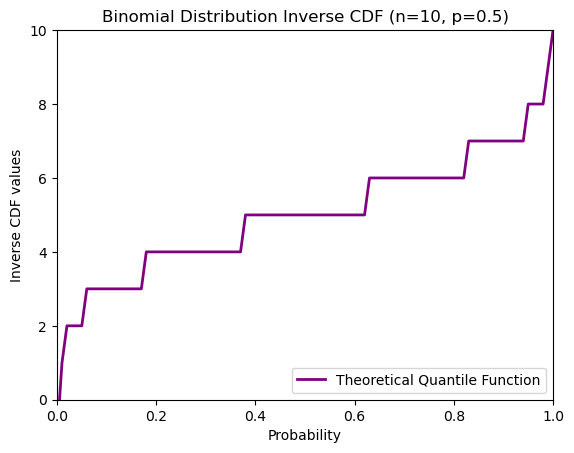

In [91]:
# evaluate the inverse CDF of the binomial distribution
# from above for 0.1 and 0.2.
# then plot the inverse CDF across the range between 0 and 1.
Inv_CDF_01 = ProbDist.ppf(0.1)
Inv_CDF_02 = ProbDist.ppf(0.2)
print("Inverse CDF at 0.1:", Inv_CDF_01)
print("Inverse CDF at 0.2:", Inv_CDF_02)

probabilities = np.linspace(0, 1, 101)
inverse_cdf_values = ProbDist.ppf(probabilities)

figure,ax = plt.subplots() # Define a new figure and axes
ax.plot(probabilities, inverse_cdf_values,'-', label='Inverse CDF', color='purple', linewidth=2)
ax.set(
    xlim = (0, 1.0),
    ylim = (0, 10.0),
    xlabel = 'Probability',
    ylabel = 'Inverse CDF values',
    title = 'Binomial Distribution Inverse CDF (n=10, p=0.5)'
)
ax.legend(["Theoretical Quantile Function"], loc = 'lower right')

Use Python's function `np.quantile(data, x)` to compute the empirical quantile of the small sample evaluated at points `p`. For the large sample, the empirical quantiles should be close (or identical) to the theoretical ones.

Empirical Quantile at 0.1: 3.0
Empirical Quantile at 0.2: 4.0


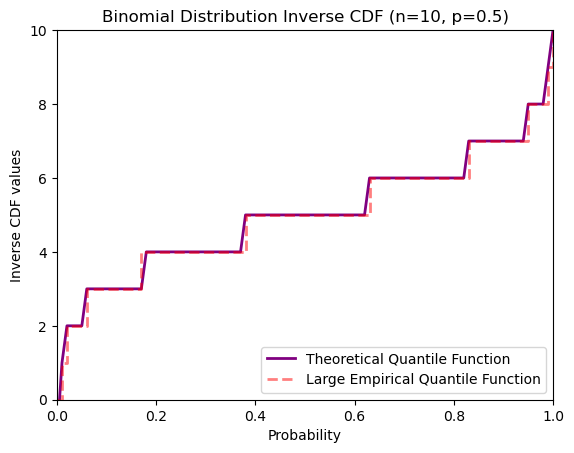

In [92]:
Emp_Quantiles_large_01 = np.quantile (large_samples, 0.1)
Emp_Quantiles_large_02 = np.quantile (large_samples, 0.2)
print("Empirical Quantile at 0.1:", Emp_Quantiles_large_01)
print("Empirical Quantile at 0.2:", Emp_Quantiles_large_02)

# Evaluate more points within (0,1)
ax.step(probabilities, np.quantile(large_samples, probabilities), where='post', linestyle='--', color='red', linewidth=2, alpha=0.5)
ax.legend(['Theoretical Quantile Function', 'Large Empirical Quantile Function'], loc = 'lower right')
ax.figure

#### Q-Q Plot
Q-Q plots are used to visually assess if empirical quantiles are close to theoretical ones, or if the quantiles of two distributions are similar. The quantiles of one distribution are plotted against the theoretical ones (or against the quantiles of the other distribution): if the points are aligned along the line , then the empirical quantiles is similar to the theoretical ones (or the two distributions are similar). Let's use a Q-Q plot to see if the quantiles of the small and large samples are similar to the quantiles of the theoretical Binomial distribution:

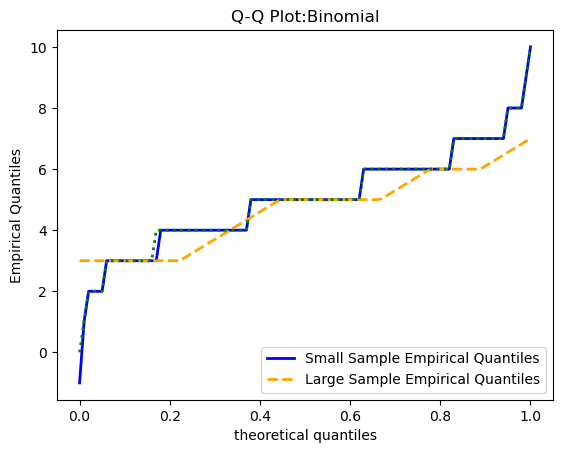

In [ ]:
# evaluate the theoretical and empirical quantiled
# for the binomial distribution and samples introduced above
# plot them against each other.

theor_quantiles = ProbDist.ppf(probabilities)
Emp_quantiles_ss = np.quantile(small_samples, probabilities)
Emp_quantiles_ls = np.quantile(large_samples, probabilities)
figure,ax = plt.subplots() # Define a new figure and axes

ax.plot(probabilities, theor_quantiles, '-', label='Theoretical Quantiles', color='blue', linewidth=2)
ax.plot(probabilities, Emp_quantiles_ss, '--', label='Small Sample Empirical Quantiles', color='orange', linewidth=2)
ax.plot(probabilities, Emp_quantiles_ls, ':', label='Large Sample Empirical Quantiles', color='green', linewidth=2)
ax.set(xlabel='theoretical quantiles', ylabel='Empirical Quantiles', title='Q-Q Plot:Binomial')
ax.legend(['Small Sample Empirical Quantiles', 'Large Sample Empirical Quantiles'], loc = 'lower right')


As expected, the quantiles of the large sample are closer to the theoretical ones than the quantiles of the small sample. The empirical quantiles of discrete distributions can be inaccurate around discontinuity points. The Q-Q plot works better for continuous distributions.

### Common Distributions
Repeat the previous analysis for the following distributions: Uniform, Exponential, Multinomial, Gamma, Normal.

For each distribution, anwser the following questions:

1. Is the RV discrete or continuous?
2. What is the domain of the RV's PDF or PMF ?
3. Describe the parameters of the distribution: how many are they? What values can they take?
4. Give one example of real world phenomenon or data that could be modelled using the distribution.

and complete the following tasks:

1. Plot the (theoretical) PDF (for contiuous RVs) or PMF (for discrete RVs) and the mean
2. Draw a sample of $S = 1000$ random outcomes.
3. Plot the empirical PDF or PMF of these samples on the same plot created in task 1.
4. Plot the (theoretical) CDF
5. Plot the empirical CDF of the samples generated in task 2 on the same plot created in task 4.
6. Use a Q-Q plot to show the similarity between empirical and theoretical quantiles.

#### Uniform Distributions

1. Is the RV discrete or continuous? 
2. What is the domain of the RV's PDF or PMF ? 
3. Describe the parameters of the distribution: how many are they? What values can they take? 
4. Give one example of real world phenomenon or data that could be modelled using the distribution. 


In [ ]:
# Make a uniform distribution between 1 and 3



#### Exponential

1. Is the RV discrete or continuous? 
2. What is the domain of the RV's PDF or PMF? 
3. Describe the parameters of the distribution: how many are they? What values can they take? 
4. Give one example of real world phenomenon or data that could be modelled using the distribution. 

In [ ]:
# Make a exponetial distribution with mu = 3



#### Multinomial (Sum of Two Fair Dices)
1. Is the RV discrete or continuous? 
2. What is the domain of the RV's PDF or PMF ? 
3. Describe the parameters of the distribution: how many are they? What values can they take? 
4. Give one example of real world phenomenon or data that could be modelled using the distribution. 


In [ ]:
# sum of two fair six-sided dice



#### Gamma (Diameter of a Tennis Ball)
1. Is the RV discrete or continuous? 
2. What is the domain of the RV's PDF or PMF 
3. Describe the parameters of the distribution: how many are they? What values can they take? 
4. Give one example of real world phenomenon or data that could be modelled using the distribution.

In [ ]:
# Make a gamma distribution with a and b parameters
a = 6540
b = 0.001


#### Normal
1. Is the RV discrete or continuous? 
2. What is the domain of the RV's PDF or PMF? 
3. Describe the parameters of the distribution: how many are they? What values can they take? 
4. Give one example of real world phenomenon or data that could be modelled using the distribution. 

In [ ]:
# Make the normal distrubtion with mu and sigma
mu = 3
sigma = 2



## **2. Estimate the Probability of Events**
The probability to observe an outcome within a contiguous range of values, for example $[x_0, x_1]$, 
can be computed using the CDF function $F_X(x)$ as 
$$Pr(x_0 \leq X < x_1) = F_X(x_1) - F_X(x_0).$$

Compute the probabilities of these events

1. That $x \in [5,6]$, for RV $X$ with Exponential distribution $P_X(x) = e^{-x/\mu}/ \mu$ and parameter $\mu = 4$.
2. That the outcome of a Standard Normal RV with $\mu = 0$ and $\sigma = 1$ is within $-\sigma$ and $\sigma$ (*ie* $x \in [-\sigma, \sigma]$). Does your result depend on $\sigma$?
3. You arrive at a bus stop and you read that there is a bus every hour. If you arrived at a random time, what is the probability that you'll wait between 5 and 20 minutes before the next bus arrives? And between 30 and 45 minutes? And between 55 and 70 minutes?


## **3. Compute the empirical CDF from data *(non-examinable)***

The CDF is defined in Eq.(1) of Lecture 1 as

$$F_X(x) = \mathrm{Prob}(X \leq x).$$

The empirical CDF can be computed following the steps described in Lecture 1:

1. Sort data in ascending order $x$.
2. Create an array $y$ of increasing integers from 1 to the length of $x$.
3. Divide each element of y by the length of $x$, so that the max of $y$ is 1.
4. If there are $(x_i, y_i)$ pairs with identical x-value, keep only the pair with the largest y-value $ y = F_X(x) $.

Use the above steps to compute the empirical CDF of the following dataset data and compare your result with the output of Scipy's `ecdf` function.

In [ ]:
data = np.array([0.9838, 1.1704, 6.8989, 1.7893, 1.5168, 
                 0.1136, 6.3209, 1.6271, 3.8187, 3.5633])



It is assumed that the ECDF values of all outcomes smaller than min(data) are zero and the ECDF values of all outcomes larger than max(data) are one.

## **4. Compute the empirical PDF from data *(non-examinable)***

The empirical PDF of a data sample can be computed following the steps described in Lecture 1:

1. Divide the range of data `[min(data), max(data)]` into bins with bin edges $b$.
2. Compute the mid-point of each bin 
   $$x_i = (b_{i+1} + b_i)/2.$$
3. Count the number of data elements that fall in each bin
   $$c_i = |{d_j : b_i ≤ d_j < b_{i+1}}|.$$
4. Normalise. Rescale each element of 
   $$c: y_i = c_i/(|d|*(b_{i+1} − b_i)),$$ 
   so that the PDF integral is 1: $y = P_x(x)$.

Use the above steps to compute the empirical PDF of the following dataset `data` using bin edges `bin_edges` and compare your result with the output of Python's `histogram` function.

In [ ]:
data = np.array([0.9838, 1.1704, 6.8989, 1.7893, 1.5168,
                 0.1136, 6.3209, 1.6271, 3.8187, 3.5633])


Change the size of the bin edges and check that the PDF is correctly normalised. 
Is it normalised even if bins have varying sizes, like `bin_edges = [0 0.75 1.5 3 5 8 12]`?

## **5. Inverse Probability Integral Transform (IPIT) sampling**

To sample from RV $ X $ with inverse CDF (*ie* the quantile function) $ F_X^{-1} $:

1. Generate a number $ u $ from the uniform distribution $ U(0, 1) $.
2. Compute $ x = F_X^{-1}(u) $.

Use the IPIT to draw 1000 independent observations from a Normal distribution with $ \mu = 5 $ and $ \sigma = 3 $.

Plot the empirical PDF (histogram) of the generated data and the theoretical PDF on the same figure.

In [ ]:
#  generate uniform random numbers


# Compute the inverse of the desired distribution


# Plot the histogram of the generated samples


# Plot the theoretical PDF to compare



***Use the IPIT to draw samples from a multinomial distribution representing the sum of two fair dice.***

For discrete distributions like this one, you can use the following code to get the quantile value $F_X^{-1}(u)$ of number $ u $:

`outcomes(min(find(th_cdf > u)))`, where `th_cdf` is the RV's CDF.

Plot the empirical PDF(histogram) of the generated data and the theoretical PDF on the same figure.

In [ ]:
# Sum of two dice
outcomes = range(2, 13, 1)
th_pdf = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
th_cdf = np.cumsum(th_pdf)

# Generate the random samples


# compare empirical and theoretical PDFs

